In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import fft as fft
from scipy import signal as signal
import scipy.io
import seaborn as sns

from get_Data import getSample

In [6]:
from scipy.fft import fft, fftfreq


def ftrans(data,freq,f0):
    N = len(data)
    T = 1.0/freq
    t = np.linspace(0.0,N*T,N,endpoint = False)
    YY = data
    #sos = sos = signal.butter(30,[1/4*freq],fs= freq,btype="low",output="sos")
    #YY = signal.sosfilt(sos,data)
    analytic_signal = signal.hilbert(YY)
    
    analytic_signal =YY
    YY= np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) /(2.0*np.pi) * freq)
    yf = fft(YY)
    xf = fftfreq(N, T)[:N//2]
    #bb = np.linspace(1,25,1)*f0/1000
    
    fn = np.arange(1,10)*25

    yf = (2.0/N * np.abs(yf[0:N//2]))

    return xf, yf

    


 

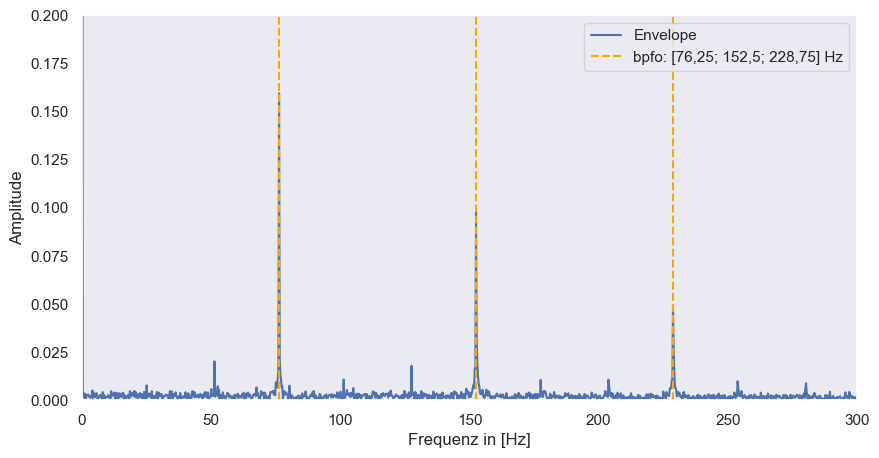

In [7]:
X,Y = getSample("bearing/KA04/","N15_M07_F10_KA04_1")
B,C = getSample("bearing/KI18/","N15_M07_F10_KI18_1")

bpfi = 76.25
xf, yf = ftrans(Y,64000,76.25)
bb = np.arange(1,10)*bpfi

sns.set(rc= {"figure.figsize": (10,5)})

fig , ax = plt.subplots()
ax.plot(xf, yf,label="Envelope")
ax.vlines(bb,0,0.4,colors="orange",linestyles="--",label="bpfo: [76,25; 152,5; 228,75] Hz")
#plt.vlines(fn,0,0.4,colors="green",linestyles="--")
ax.set_xlabel("Frequenz in [Hz]")
ax.set_ylabel("Amplitude")
ax.legend()
plt.xlim(0,300)
plt.ylim(0,0.2)
plt.grid()
plt.show()

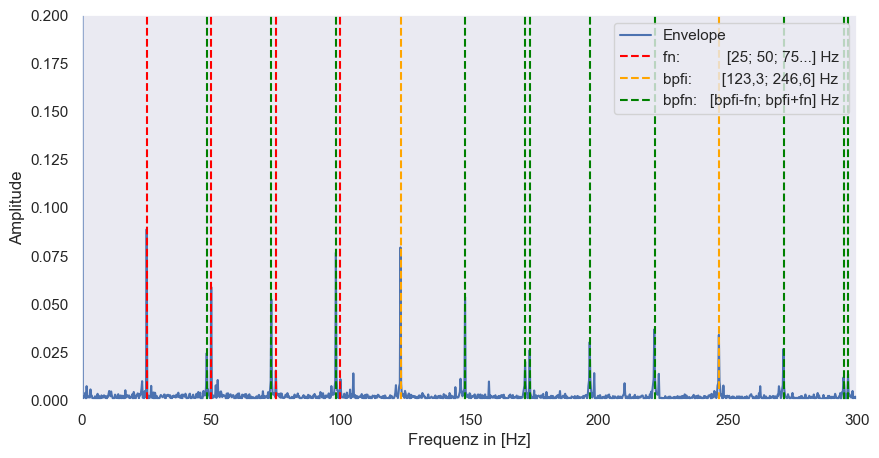

In [8]:
bpfi = 123.3
f0 = 25.0
xxf, yyf = ftrans(C,64000,123.3)
bb = np.arange(1,10)*bpfi
ba1 = np.arange(1,10)*bpfi+25
ba2 = np.arange(1,10)*bpfi-25
ba3 = np.arange(1,10)*bpfi+50
ba4 = np.arange(1,10)*bpfi-50
ba5 = np.arange(1,10)*bpfi-75

bt = [ba1,ba2,ba3,ba4,ba5]

bs = np.arange(1,5)*f0

fig , ax = plt.subplots()
ax.plot(xxf, yyf,label="Envelope")
ax.vlines(bs,0,0.4,colors="red",linestyles="--",label="fn:           [25; 50; 75...] Hz ")
ax.vlines(bb,0,0.4,colors="orange",linestyles="--",label="bpfi:       [123,3; 246,6] Hz")
#ax.vlines(ba2,0,0.4,colors="green",linestyles="--",label="bpfi: 123,3 Hz\n        246,6 Hz")
#ax.vlines(ba3,0,0.4,colors="green",linestyles="--",label="bpfi: 123,3 Hz\n        246,6 Hz")
#ax.vlines(ba4,0,0.4,colors="green",linestyles="--",label="bpfi: 123,3 Hz\n        246,6 Hz")
ax.vlines(bt,0,0.4,colors="green",linestyles="--",label="bpfn:   [bpfi-fn; bpfi+fn] Hz")
#plt.vlines(fn,0,0.4,colors="green",linestyles="--")
ax.set_xlabel("Frequenz in [Hz]")
ax.set_ylabel("Amplitude")
ax.legend()
plt.xlim(0,300)
plt.ylim(0,0.2)
plt.grid()
plt.show()